In [2]:
# pip install utils

Note: you may need to restart the kernel to use updated packages.


In [4]:
# pip install livelossplot

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install --upgrade h5py

  Using cached h5py-3.7.0-cp38-cp38-win_amd64.whl (2.6 MB)
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires h5py~=3.1.0, but you have h5py 3.7.0 which is incompatible.
tensorflow 2.6.0 requires numpy~=1.19.2, but you have numpy 1.20.1 which is incompatible.
tensorflow 2.6.0 requires typing-extensions~=3.7.4, but you have typing-extensions 4.2.0 which is incompatible.


In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
from livelossplot.inputs.tf_keras import PlotLossesCallback
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.6.0


In [13]:
for expression in os.listdir("D:/Ashwin_SPIT/Sem3/Project/Face/Emotions/Train/Train/"):
    print(str(len(os.listdir("D:/Ashwin_SPIT/Sem3/Project/Face/Emotions/Train/Train/" + expression))) + " " + expression + " images")

3995 angry images
436 disgust images
4097 fear images
7215 happy images
4965 neutral images
4830 sad images
3171 surprise images


In [14]:
img_size = 48
batch_size = 64

datagen_train = ImageDataGenerator(horizontal_flip=True)
train_generator = datagen_train.flow_from_directory("D:/Ashwin_SPIT/Sem3/Project/Face/Emotions/Train/Train/",
                                                   target_size = (img_size,img_size), 48x48
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)

datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_train.flow_from_directory("D:/Ashwin_SPIT/Sem3/Project/Face/Emotions/Test/Test/",
                                                   target_size = (img_size,img_size),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [18]:
# create CNN model

model = Sequential()

# 1st CNN layer
model.add(Conv2D(64, (3,3), padding="same", input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Dropout(0.25))

# 2nd CNN
model.add(Conv2D(128, (5,5), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Dropout(0.25))

# 3rd CNN
model.add(Conv2D(512, (3,3), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Dropout(0.25))

# 4rt CNN
model.add(Conv2D(512, (3,3), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())

# 1st Fully connected layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.25))

# 2nd Fully connected layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.25))

model.add(Dense(7, activation="softmax"))

opt = Adam(learning_rate=0.0005)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_8 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
activation_8 (Activation)    (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_9 (Batch (None, 24, 24, 128)      

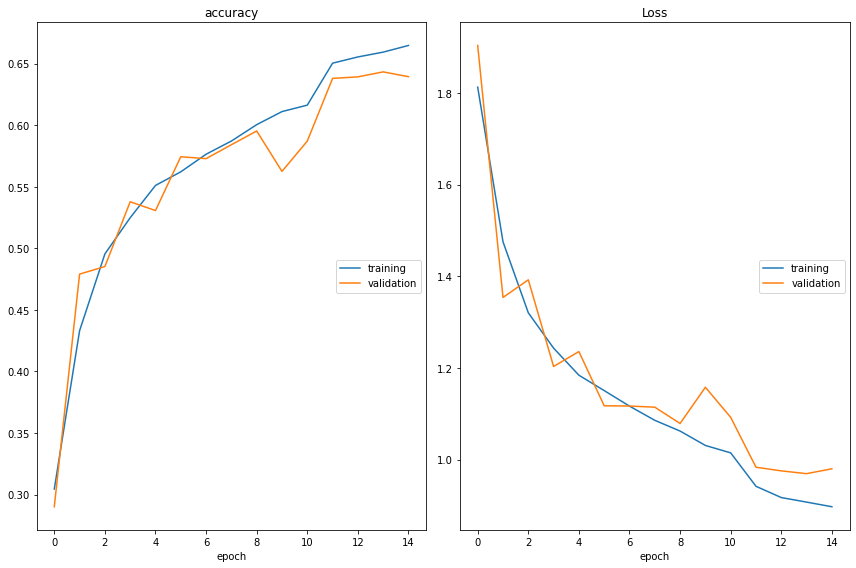

accuracy
	training         	 (min:    0.305, max:    0.665, cur:    0.665)
	validation       	 (min:    0.290, max:    0.643, cur:    0.639)
Loss
	training         	 (min:    0.897, max:    1.812, cur:    0.897)
	validation       	 (min:    0.969, max:    1.903, cur:    0.980)

Epoch 00015: saving model to D:/Ashwin_SPIT/Sem3/Project/Face/Emotions\model_weight.h5
Wall time: 2h 40min 5s


In [25]:
%%time

epochs = 15

steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.1,
                             patience=2, min_lr=0.00001, mode="auto")

checkpoint = ModelCheckpoint("D:/Ashwin_SPIT/Sem3/Project/Face/Emotions/model_weight.h5",
                            monitor = "val_accuracy", save_weights_only=True,
                            mode = "max", verbose = 1)

callbacks = [PlotLossesCallback(), checkpoint, reduce_lr]

history = model.fit(
    x=train_generator,
    steps_per_epoch = steps_per_epoch,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks=callbacks
)

In [4]:
from tensorflow.keras.models import model_from_json,load_model
import numpy as np

import tensorflow as tf

class FacialExpressionModel(object):
    EMOTIONS_LIST = ["Angry", "Disgust",
                    "Fear", "Happy",
                    "Neutral", "Sad",
                    "Surprise"]
    
    def __init__(self, model_json_file, model_weights_file):
        #load model form Json file
        with open(model_json_file, "r") as json_file:
            loaded_model_json = json_file.read()
            self.loaded_model = model_from_json(loaded_model_json)
            
        # load weights into new model
        self.loaded_model.load_weights(model_weights_file)
        self.loaded_model.make_predict_function()
        
    def predict_emotion(self, img):
        self.preds = self.loaded_model.predict(img)
        return FacialExpressionModel.EMOTIONS_LIST[np.argmax(self.preds)]

In [1]:
from keras.models import load_model
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import numpy as np
import cv2

face_classifier = cv2.CascadeClassifier(r'D:\Ashwin_SPIT\Sem3\Project\Face\Emotions\haarcascade_frontalface_default.xml')
classifier = load_model(r'D:\Ashwin_SPIT\Sem3\Project\Face\Emotions\model_weight.h5')


class_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']


cap = cv2.VideoCapture(0)

while cap.isOpened():

    ret, frame = cap.read()

    labels = []
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_gray = cv2.resize(roi_gray, (48, 48), interpolation=cv2.INTER_AREA)

        if np.sum([roi_gray]):
            roi = roi_gray.astype('float')/255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi, axis=0)

            # Prediction
            preds = classifier.predict(roi)[0]
            label = class_labels[preds.argmax()]
            label_position = (x, y)
            cv2.putText(frame, label, label_position,
                        cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
        else:
            cv2.putText(frame, 'No Face Found', (20, 60),
                        cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
    cv2.imshow('Emotion Detector', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
